In [2]:
import pandas as pd
import numpy as np
data = pd.read_csv('titanic3.csv')


In [3]:
data.replace('?', np.nan, inplace= True)
data = data.astype({"age": np.float64, "fare": np.float64})

<AxesSubplot:xlabel='survived', ylabel='fare'>

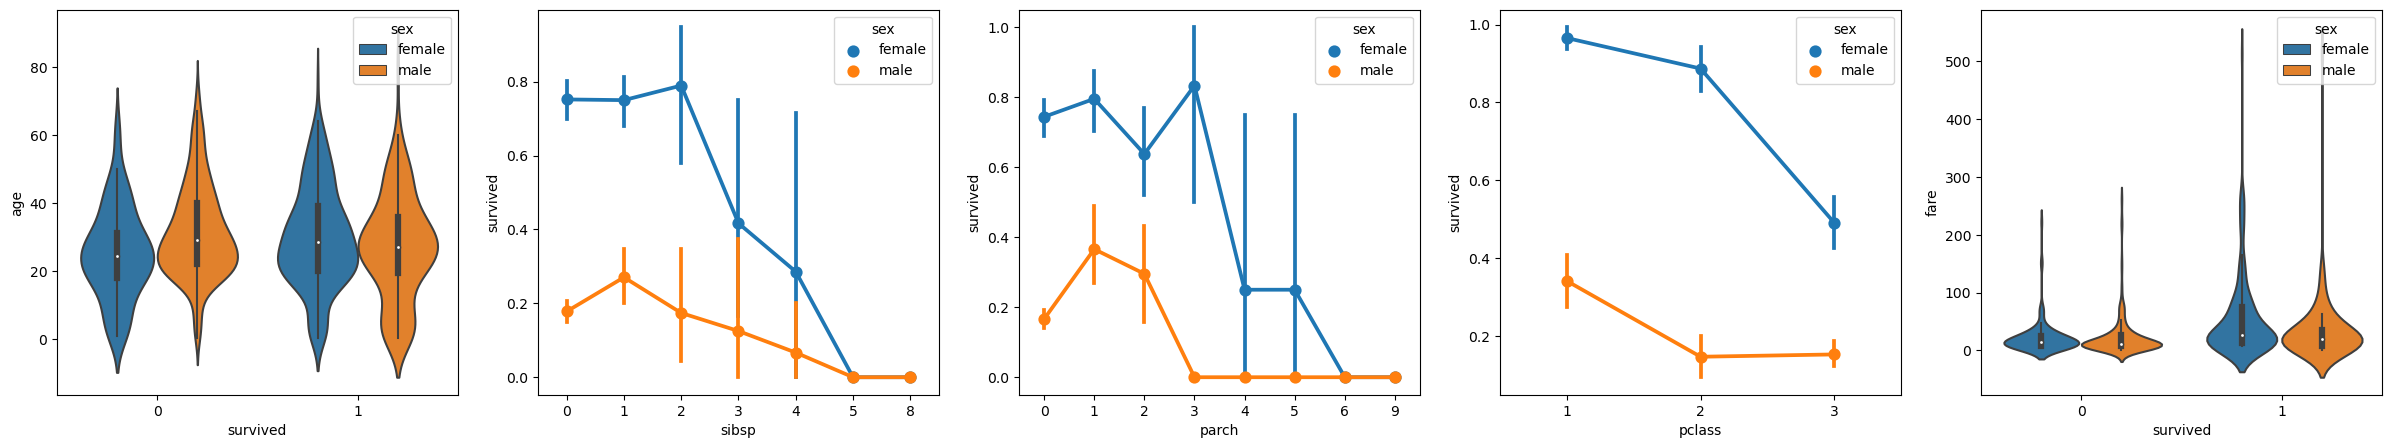

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="survived", y="age", hue="sex", data=data, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=axs[4])

In [5]:
data.replace({'male': 1, 'female': 0}, inplace=True)

In [6]:
data.corr().abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055512
sibsp,0.027825
parch,0.082660
fare,0.244265
body,NaN


In [7]:
data['relatives'] = data.apply (lambda row: int((row['sibsp'] + row['parch']) > 0), axis=1)
data.corr().abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055512
sibsp,0.027825
parch,0.082660
fare,0.244265
body,NaN
relatives,0.201719


In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data[['sex','pclass','age','relatives','fare']], data.survived, test_size=0.2, random_state=0)

In [9]:
data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,relatives
0,1,1,"Allen, Miss. Elisabeth Walton",0,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",0
1,1,1,"Allison, Master. Hudson Trevor",1,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1,0,"Allison, Miss. Helen Loraine",0,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",0,14.50,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,1
1305,3,0,"Zabour, Miss. Thamine",0,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,1
1306,3,0,"Zakarian, Mr. Mapriededer",1,26.50,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,0
1307,3,0,"Zakarian, Mr. Ortin",1,27.00,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,0


In [10]:
data.to_excel("titanic.xlsx",sheet_name="passengers", index=False)

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display
%matplotlib inline

data = pd.read_csv('titanic3.csv')

<AxesSubplot:>

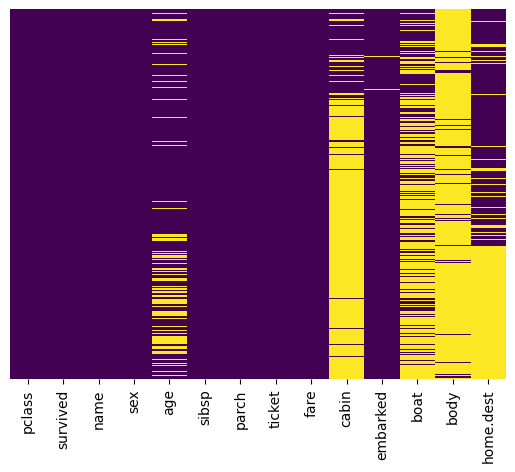

In [12]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [13]:
datadict = pd.DataFrame(data.dtypes)
datadict

,0
pclass,int64
survived,int64
name,object
sex,object
age,float64
sibsp,int64
parch,int64
ticket,object
fare,float64
cabin,object


In [14]:
datadict['MissingVal'] = data.isnull().sum()
datadict

,0,MissingVal
pclass,int64,0
survived,int64,0
name,object,0
sex,object,0
age,float64,263
sibsp,int64,0
parch,int64,0
ticket,object,0
fare,float64,1
cabin,object,1014


In [15]:
datadict['Count'] = data.count
datadict

,0,MissingVal,Count
pclass,int64,0,<bound method DataFrame.count of pclass ...
survived,int64,0,<bound method DataFrame.count of pclass ...
name,object,0,<bound method DataFrame.count of pclass ...
sex,object,0,<bound method DataFrame.count of pclass ...
age,float64,263,<bound method DataFrame.count of pclass ...
sibsp,int64,0,<bound method DataFrame.count of pclass ...
parch,int64,0,<bound method DataFrame.count of pclass ...
ticket,object,0,<bound method DataFrame.count of pclass ...
fare,float64,1,<bound method DataFrame.count of pclass ...
cabin,object,1014,<bound method DataFrame.count of pclass ...
